In [1]:
import numpy as np
from scipy.ndimage import rotate, shift
import pyvista


In [23]:
a = np.array([1,1])
np.any(a!=1)

False

In [2]:
# matrix

def makeGaussian(size, fwhm=3, center=None, amp=1):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)/ (2*np.pi*fwhm**2)/(-4*np.log(2))**2

def makeRod(size, width):
    arr = np.zeros([size]*2)
    arr[:, size//2-width//2 : size//2+width//2] = 1
    return arr


C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


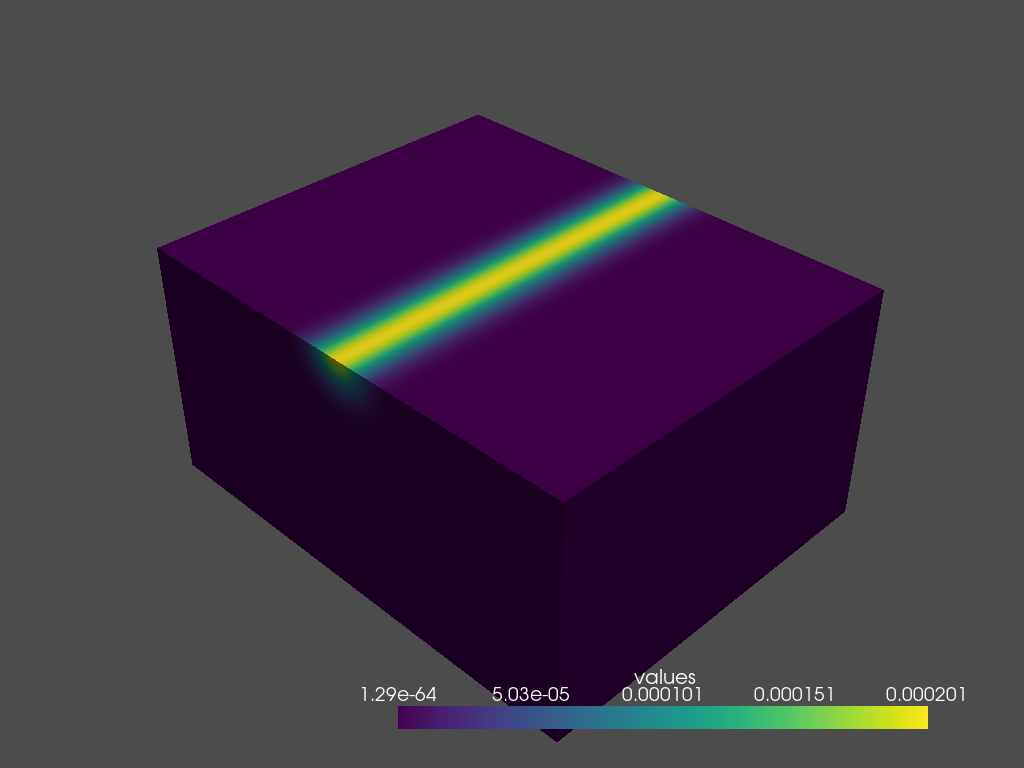

In [3]:
size = (100, 80)
fwhm = 10

arr3d = np.array([makeGaussian(size[0], fwhm=fwhm)]*size[1])
plotter = pyvista.Plotter()
plotter.add_mesh(arr3d[:, :, :size[0]//2], show_edges=False)
plotter.show()

C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


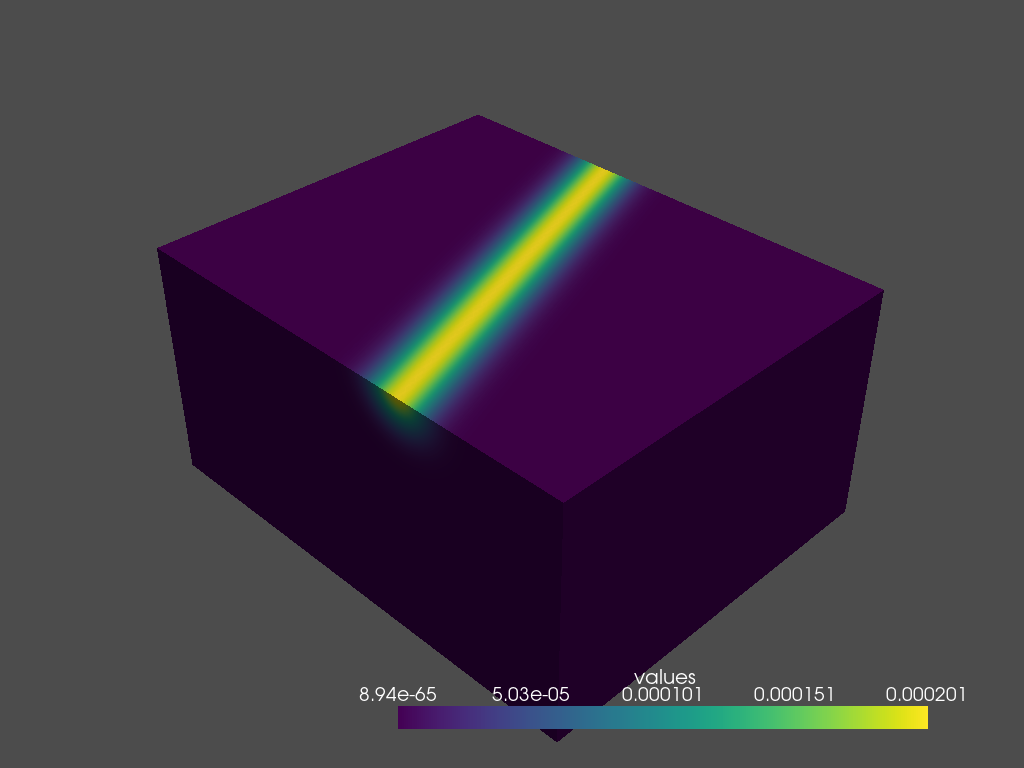

In [4]:
rot1 = rotate(arr3d, 20, mode='nearest', reshape=False)
plotter = pyvista.Plotter()
plotter.add_mesh(rot1[:, :, :size[0]//2], show_edges=False)
plotter.show()

(80, 100, 100)
[64 50] [61 50] [3 0]


C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


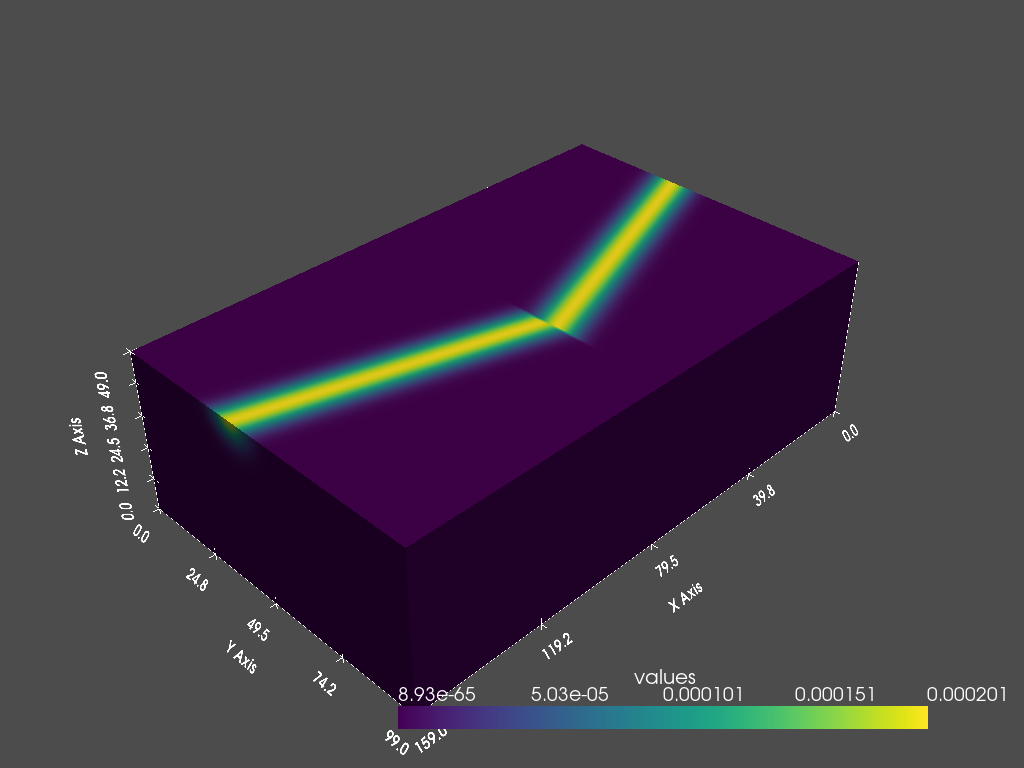

In [5]:
lay1, lay2 = rot1, arr3d
rot2 = rotate(lay2,-15, mode='nearest', reshape=False)
print(lay1.shape)
stitch_pos1 = np.ndarray.flatten(np.array(np.where(lay1[len(lay1)-1, :, :]==np.max(lay1[len(lay1)-1, :, :]))))
stitch_pos2 = np.ndarray.flatten(np.array(np.where(rot2[0, :, :]==np.max(rot2[0, :, :]))))
print(stitch_pos1, stitch_pos2, stitch_pos1-stitch_pos2)

layers1_unstitched = np.vstack((lay1, rot2))
                   
plotter = pyvista.Plotter()
plotter.add_mesh(layers1_unstitched[:, :, :size[0]//2], show_edges=False)
plotter.show_grid()
plotter.show()

[3, 0]


C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


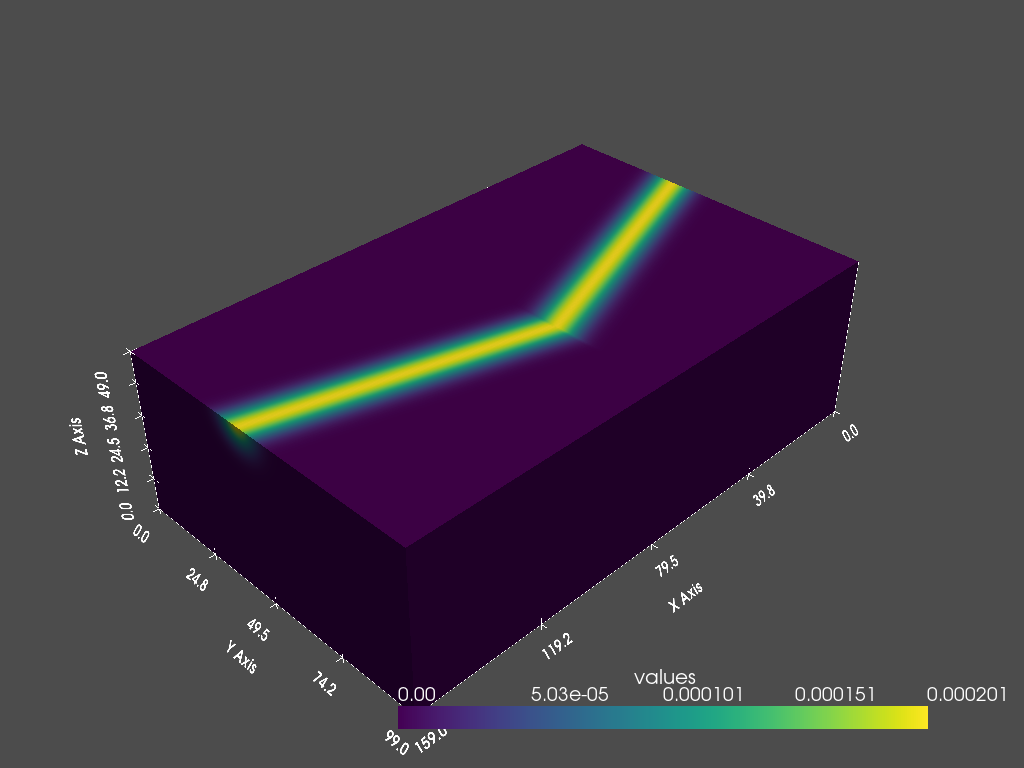

In [6]:
diff = list(stitch_pos1-stitch_pos2)
print(diff)
rot2_trans = shift(rot2, [0]+diff)
layers1 = np.vstack((lay1, rot2_trans))

plotter = pyvista.Plotter()
plotter.add_mesh(layers1[:, :, :size[0]//2], show_edges=False)
plotter.show_grid()
plotter.show()


C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


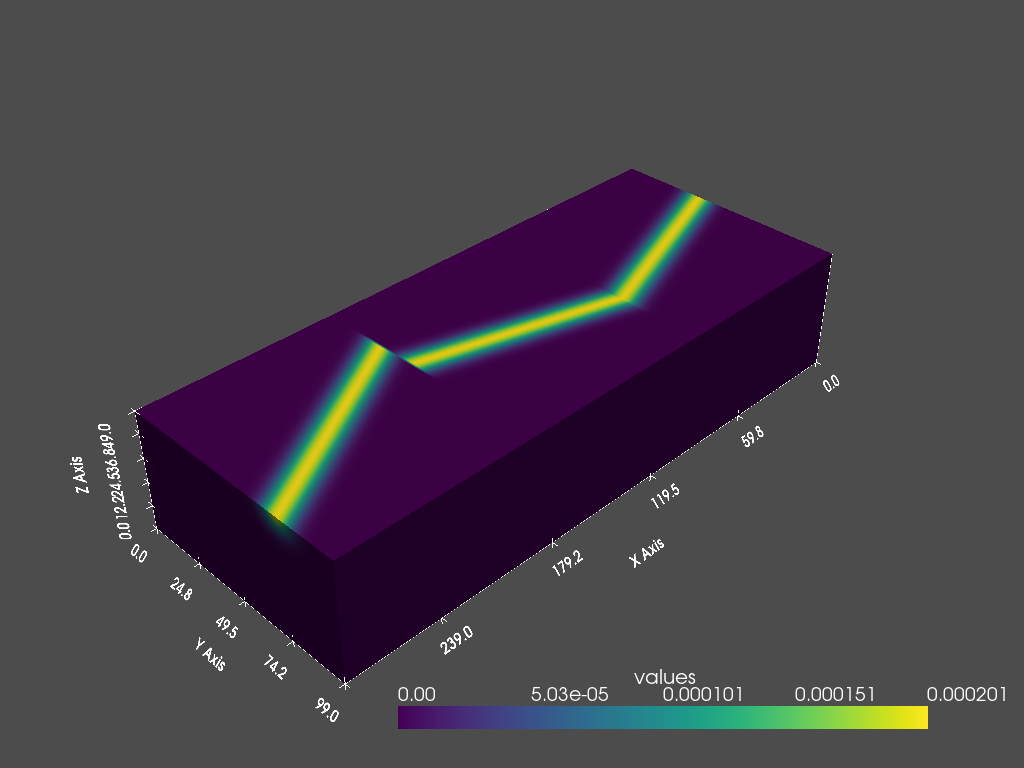

In [7]:
rot3 = rotate(arr3d, 30, mode='nearest', reshape=False)

layers2_unstitched = np.vstack((layers1, rot3))
plotter = pyvista.Plotter()
plotter.add_mesh(layers2_unstitched[:, :, :size[0]//2], show_edges=False)
plotter.show_grid()
plotter.show()

C:\Users\Wright\Miniconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


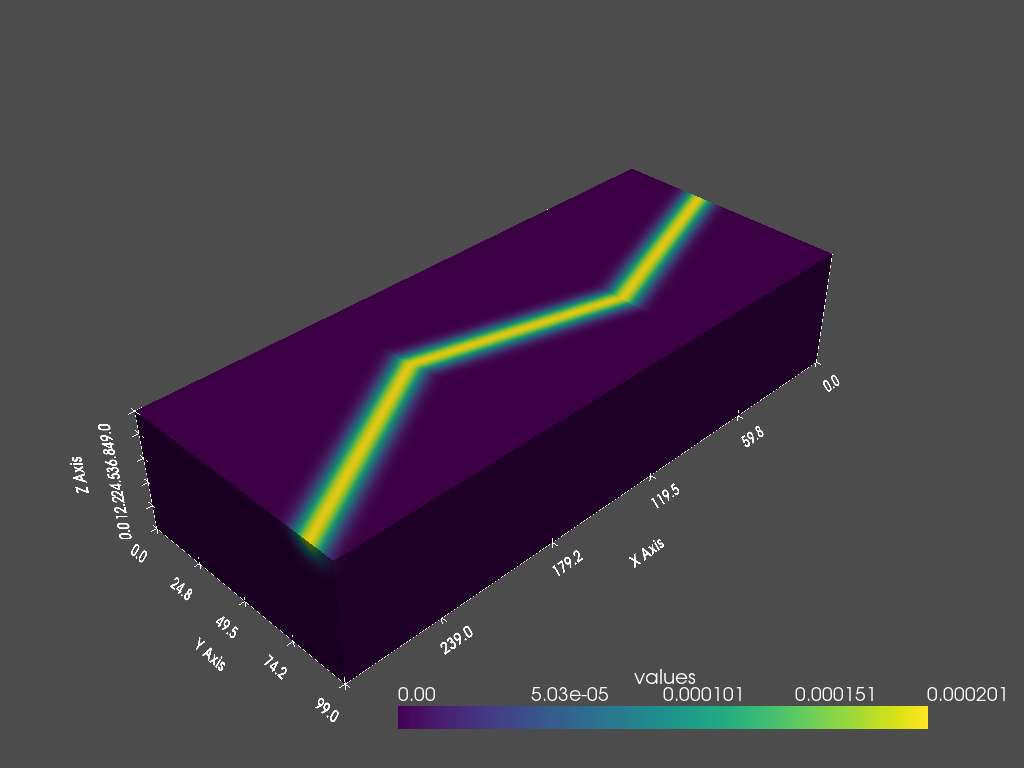

In [8]:
stitch_pos3 = np.ndarray.flatten(np.array(np.where(layers1[len(layers1)-1, :, :]==np.max(layers1[len(layers1)-1, :, :]))))
stitch_pos4 = np.ndarray.flatten(np.array(np.where(rot3[0, :, :]==np.max(rot3[0, :, :]))))
diff = list(stitch_pos3-stitch_pos4)

rot3_trans = shift(rot3, [0]+diff)
layers2 = np.vstack((layers1, rot3_trans))

plotter = pyvista.Plotter()
plotter.add_mesh(layers2[:, :, :size[0]//2])
plotter.show_grid()
plotter.show()
